In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

### Nike : Intra-brand

In [2]:
import os

In [3]:
os.getcwd()

'/Users/abhinavsharma/Documents/GitHub/Unstructured-Data-Analytics/Project'

In [4]:
nike_tf = pd.read_csv('./Nike/nike_caption_tf.csv')
nike_metrics = pd.read_csv('Nike/nike_data.csv')

In [5]:
nike_tf[nike_tf.isnull().any(axis=1)]

,Unnamed: 0,really,shawnjohnsons,toddantonyphoto,nosajthe,broken,tired,collect,brasileira,best,...,universal,narrow,bowerman,corner,rise,tomckean,fencer,gomofarah,racer,caption_list
70,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,['nan']


In [6]:
nike_metrics.drop(index = nike_tf[nike_tf.isnull().any(axis=1)].index ,inplace=True)
nike_metrics.shape

(611, 6)

In [7]:
nike_tf.dropna(inplace=True)

In [8]:
nike_tf.shape

(611, 2833)

In [9]:
nike_tf.drop(['Unnamed: 0', 'caption_list', 'caption'], inplace=True, axis=1)


In [10]:
nike_tf.isna().sum().sum()

0

In [11]:
nike_tf.sum(axis=0)

really             5
shawnjohnsons      1
toddantonyphoto    1
nosajthe           1
broken             1
                  ..
rise               7
tomckean           1
fencer             1
gomofarah          1
racer              2
Length: 2830, dtype: int64

In [12]:
nike_tf.sum(axis=0)

really             5
shawnjohnsons      1
toddantonyphoto    1
nosajthe           1
broken             1
                  ..
rise               7
tomckean           1
fencer             1
gomofarah          1
racer              2
Length: 2830, dtype: int64

In [13]:
freq_Nike = pd.DataFrame(nike_tf.sum(axis=0),nike_tf.columns,columns=['Frequency']).reset_index()
freq_Nike


,index,Frequency
0,really,5
1,shawnjohnsons,1
2,toddantonyphoto,1
3,nosajthe,1
4,broken,1
...,...,...
2825,rise,7
2826,tomckean,1
2827,fencer,1
2828,gomofarah,1


In [14]:
freq_Nike['Frequency'] = freq_Nike['Frequency'].astype(str).astype(int)
freq_Nike.describe()

,Frequency
count,2830.000000
mean,3.577032
std,8.989659
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,281.000000


In [15]:
#FYR
freq_Nike.sort_values(by='Frequency',ascending=False)
freq_Nike.to_csv('Nike/freq_Nike.csv',index=False)

### Adidas


In [16]:
adidas_tf = pd.read_csv('./Adidas/adidas_caption_tf.csv')
adidas_tf.dropna(inplace=True)
adidas_tf.drop(['Unnamed: 0', 'caption_list', 'caption'], inplace=True, axis=1)
adidas_tf.isna().sum().sum()


0

In [17]:
freq_Adidas = pd.DataFrame(adidas_tf.sum(axis=0),adidas_tf.columns,columns=['Frequency']).reset_index()
#freq_Adidas

In [18]:
#FYR
freq_Adidas.sort_values(by='Frequency',ascending=False)
freq_Adidas.to_csv('Adidas/freq_Adidas.csv',index=False)

### Nike - Top 20 percent engagement

In [19]:
#nike_tf = pd.read_csv('./Nike/nike_caption_tf.csv')
#len(set(nike_metrics['caption']).intersection(set(nike_tf['caption']))) -- 410
len(nike_metrics)

611

In [22]:
def likes_conversion(likes):
    if 'k' in likes:
        return int(likes.replace('k', ''))
    elif 'm' in likes:
        return 1000*int(likes.replace('m', ''))
    elif ('k' not in likes) & ('m' not in likes):
        return int(likes.replace('m', ''))/1000
    else:
        return int(likes)
nike_metrics['n_likes_1000'] = nike_metrics['n_likes_1000'].map(likes_conversion)

In [27]:
lower_l = nike_metrics.quantile(0.2)['n_likes_1000']
upper_l = nike_metrics.quantile(0.8)['n_likes_1000']
upper_l

336.0

In [34]:
nike_tf['Likes'] = nike_metrics['n_likes_1000']
intra_nike_low = nike_tf[nike_tf['Likes'] <= lower_l]
intra_nike_low.drop('Likes',inplace=True,axis=1)
intra_nike_high = nike_tf[nike_tf['Likes'] >= upper_l]
intra_nike_high.drop('Likes',inplace=True,axis=1)

In [37]:
freq_Nike_l = pd.DataFrame(intra_nike_low.sum(axis=0),intra_nike_low.columns,columns=['Frequency']).reset_index()
freq_Nike_l['Frequency'] = freq_Nike_l['Frequency'].astype(str).astype(int)
freq_Nike_l = freq_Nike_l.sort_values(by='Frequency',ascending=False)
freq_Nike_l.to_csv('Nike/freq_Nike_lowlikes.csv',index=False)
freq_Nike_l

,index,Frequency
604,nike,104
2440,run,44
2775,nikeplus,26
133,marathon,26
2737,nikefuel,17
...,...,...
1110,sorry,0
1112,devote,0
1113,jump,0
1114,ensine,0


In [38]:
freq_Nike_u = pd.DataFrame(intra_nike_high.sum(axis=0),intra_nike_high.columns,columns=['Frequency']).reset_index()
freq_Nike_u['Frequency'] = freq_Nike_u['Frequency'].astype(str).astype(int)
freq_Nike_u = freq_Nike_u.sort_values(by='Frequency',ascending=False)
freq_Nike_u.to_csv('Nike/freq_Nike_highlikes.csv',index=False)
freq_Nike_u

,index,Frequency
1943,justdoit,64
1141,world,25
1860,dream,18
1102,woman,14
604,nike,14
...,...,...
1101,saradunlop,0
1100,force,0
1099,global,0
1098,kristina,0


/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abhinavsharma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

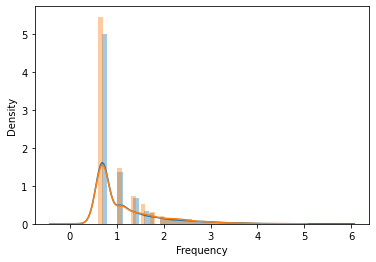

In [50]:
#Sns histogram - Inter brand
import seaborn as sns
import numpy as np

sns.distplot(np.log(1+freq_Nike['Frequency']))
sns.distplot(np.log(1+freq_Adidas['Frequency']))